In [2]:
import pandas as pd
from pandas.api.types import is_datetime64_any_dtype as is_datetime

In [3]:
df=pd.read_csv(r"C:\Finiti Tools\20221115_20211115.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,9,13,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
def grouper(df:pd.DataFrame,cols:list,agg_func:dict)->pd.DataFrame:    
    #return df.groupby(cols).agg(agg_func)
    return pd.pivot_table(df,index=cols,aggfunc=agg_func)


In [7]:
#TODO: להוסיף תאריך/יום בשבוע+שעה
def freq_parser(dt_data:pd.Series,freq:str)->pd.Series:
    if freq=='h':
        return dt_data.dt.hour
    if freq=='d':
        return dt_data.dt.date
    if freq=='w_d':
        return dt_data.dt.dayofweek.map({7:1,0:2,1:3,2:4,3:5,4:6,5:7})
    if freq=='w':
        tmp=dt_data.dt.isocalendar()
        tmp.loc[tmp.day==7,'week']+=1
        tmp.loc[tmp.week==53,'week']=1        
        return tmp.week
    if freq=='q':
        return dt_data.dt.quarter        
    if freq=='m':
        return dt_data.dt.month  
    if freq=='y':
        return dt_data.dt.year  
        
    

In [8]:
def rule_grouper(df:pd.DataFrame,entity:str,date_col:str,col_options:list,agg_func:dict,freqs:list):
    if not is_datetime(df[date_col]):
        df[date_col]=pd.to_datetime(df[date_col])
         
    tmp=[]

    for freq in freqs: 
        df[freq]=freq_parser(df[date_col],freq)        
        for options in col_options:
            tmp.append(grouper(df,[entity]+options+[freq],agg_func))
            
    return tmp
        
    

In [15]:
df_tmp=df[['ip_tar_bitzua','ip_kod_iska','user_mevatza','schum_rashi','snif_mevatza','lak_iska']]

In [31]:
tmp1=rule_grouper(df_tmp,'lak_iska','ip_tar_bitzua',[['snif_mevatza','ip_kod_iska']],{'schum_rashi':['count','sum']},freqs=['h','d'])

C:\Users\roma\AppData\Local\Temp\70/ipykernel_154388/1426662862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[freq]=freq_parser(df[date_col],freq)


In [32]:
tmp1[0].columns

MultiIndex([('schum_rashi', 'count'),
            ('schum_rashi',   'sum')],
           )

In [33]:
tmp1[0].columns=['_'.join([i,j]) for i,j in tmp1[0].columns]
tmp1[-1].columns=['_'.join([i,j]) for i,j in tmp1[-1].columns]

In [68]:
tmp123=tmp1[-1].reset_index()

In [69]:
tmp123.loc[tmp123.lak_iska==101625498,['schum_rashi_count','schum_rashi_sum']].describe().T

,count,mean,std,min,25%,50%,75%,max
schum_rashi_count,21.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
schum_rashi_sum,21.0,1061.285238,153.847941,890.05,920.11,1133.39,1157.56,1438.42


In [74]:
#TODO:  התאמה לטבלת איפיון
def basic_stat_after_grouping()
    dif_info=[]
    for lak in tmp123.snif_mevatza.unique():
        a=tmp123.loc[tmp123.snif_mevatza==lak,['schum_rashi_count','schum_rashi_sum']].describe().T
        a['info']=['count','sum']
        a['lak']=lak
        dif_info.append(a)
    

In [73]:
tmp123

,snif_mevatza,ip_kod_iska,lak_iska,d,schum_rashi_count,schum_rashi_sum
0,1.0,65,101625498,2022-08-10,1,1183.09
1,1.0,65,200104304,2022-08-10,1,1012.99
2,1.0,65,200447835,2022-07-01,1,2035.76
3,1.0,65,200462965,2022-07-01,1,1864.32
4,1.0,65,200531224,2022-08-10,2,1972.58
...,...,...,...,...,...,...
798072,67.0,533,970001723,2022-05-17,6,26000000.00
798073,67.0,533,970001723,2022-05-25,8,26075418.00
798074,67.0,533,970004222,2022-05-25,1,121005.00
798075,67.0,H42,500214390,2022-06-01,1,100000.00


In [75]:
pd.concat(dif_info).reset_index(drop=True)

,count,mean,std,min,25%,50%,75%,max,info,lak
0,795648.0,1.350151e+00,1.850277e+00,1.00,1.00,1.00,2.00,4.140000e+02,count,1.0
1,795648.0,5.262595e+07,9.890911e+09,-104.28,6.00,750.23,1138.82,5.000000e+12,sum,1.0
2,421.0,1.539192e+00,1.523314e+00,1.00,1.00,1.00,1.00,1.000000e+01,count,9.0
3,421.0,7.601363e+09,5.467816e+10,0.00,6.00,16000.00,372235.07,8.000000e+11,sum,9.0
4,592.0,1.853041e+00,1.860723e+00,1.00,1.00,1.00,2.00,8.000000e+00,count,30.0
5,592.0,1.689580e+09,1.289749e+10,-405.00,0.00,5.00,1300.00,1.000000e+11,sum,30.0
6,16.0,2.500000e+00,3.033150e+00,1.00,1.00,1.00,3.00,1.300000e+01,count,31.0
7,16.0,7.054250e+04,1.193785e+05,1700.00,3537.50,23500.00,68060.50,4.360980e+05,sum,31.0
8,5.0,1.200000e+00,4.472136e-01,1.00,1.00,1.00,1.00,2.000000e+00,count,36.0
9,5.0,4.420000e+03,8.722428e+03,50.00,50.00,1000.00,1000.00,2.000000e+04,sum,36.0


In [80]:
df.loc[df.schum_rashi>10**9]

,rownum1,ip_m_iska,ip_kod_nr,ip_kod_iska,ip_m_iska_mishni,ip_tar_bitzua,ip_shaa,ip_date_bitzua,shem_gorem_mevatza,user_mevatza,...,ip_asm,ip_tar_erech,schum_rashi,hearot_la_iska,ip_kod_biyul,ip_m_ibud,ip_m_bank_4,ip_m_lak_4,ip_m_snif_4,pirte_zehut
70573,79016756000,79016756,1,H04,0,2022-01-31 00:00:00,20:52:00,2022-01-31 20:52:00,על ידי המחשב,NaN,...,,20220131,1.000000e+11,...,,Y755961,NaN,NaN,NaN,"KOD_ZIHUY - ZIHUY:1,000000015949191,KOD_SUG_KE..."
70602,79016757000,79016757,1,H04,0,2022-01-31 00:00:00,20:52:00,2022-01-31 20:52:00,על ידי המחשב,NaN,...,,20220131,1.000000e+11,...,,Y755968,NaN,NaN,NaN,"KOD_ZIHUY - ZIHUY:1,000000012389144,KOD_SUG_KE..."
70603,79016767000,79016767,1,H04,0,2022-01-31 00:00:00,20:53:00,2022-01-31 20:53:00,על ידי המחשב,NaN,...,,20220131,1.000000e+11,...,,Y755975,NaN,NaN,NaN,"KOD_ZIHUY - ZIHUY:1,000000025500208,KOD_SUG_KE..."
70604,79016768000,79016768,1,H04,0,2022-01-31 00:00:00,20:53:00,2022-01-31 20:53:00,על ידי המחשב,NaN,...,,20220131,1.000000e+11,...,,Y755975,NaN,NaN,NaN,"KOD_ZIHUY - ZIHUY:1,000000025500208,KOD_SUG_KE..."
70605,79016777000,79016777,1,H04,0,2022-01-31 00:00:00,20:53:00,2022-01-31 20:53:00,על ידי המחשב,NaN,...,,20220131,1.000000e+11,...,,Y755979,NaN,NaN,NaN,"KOD_ZIHUY - ZIHUY:1,000000059964189,KOD_SUG_KE..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041125,429532,80079278,1,A37,7,2022-10-25 00:00:00,08:46:00,2022-10-25 08:46:00,הילה שקד,HILASH,...,0080079278,20221025,1.000000e+11,...,,Z950876,NaN,NaN,NaN,"KOD_ZIHUY - ZIHUY:1,000000029246279,KOD_SUG_KE..."
1041301,429544,80079282,1,A37,7,2022-10-25 00:00:00,08:54:00,2022-10-25 08:54:00,הילה שקד,HILASH,...,0080079282,20221025,1.000000e+11,...,,Z950876,NaN,NaN,NaN,"KOD_ZIHUY - ZIHUY:1,000000336298047,KOD_SUG_KE..."
1053551,429555,80079284,1,A37,7,2022-10-25 00:00:00,09:01:00,2022-10-25 09:01:00,הילה שקד,HILASH,...,0080079284,20221025,1.000000e+11,...,,Z950876,NaN,NaN,NaN,"KOD_ZIHUY - ZIHUY:1,000000310819131,KOD_SUG_KE..."
1053563,429567,80079287,1,A37,7,2022-10-25 00:00:00,09:10:00,2022-10-25 09:10:00,הילה שקד,HILASH,...,0080079287,20221025,1.000000e+11,...,,Z950876,NaN,NaN,NaN,"KOD_ZIHUY - ZIHUY:1,000000310819131,KOD_SUG_KE..."


<AxesSubplot:ylabel='Frequency'>

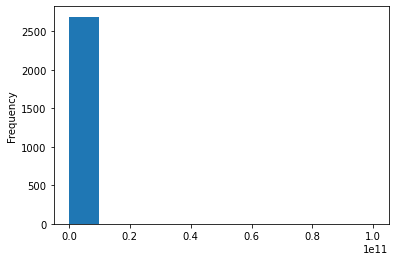

In [79]:
df.loc[df.snif_mevatza==50.0,'schum_rashi'].plot.hist()

In [72]:
pd.concat(dif_info).reset_index(drop=True)

,count,mean,std,min,25%,50%,75%,max,info,lak
0,21.0,1.000000,0.000000,1.00,1.0000,1.000,1.0000,1.00,count,101625498
1,21.0,1061.285238,153.847941,890.05,920.1100,1133.390,1157.5600,1438.42,sum,101625498
2,22.0,1.090909,0.294245,1.00,1.0000,1.000,1.0000,2.00,count,200104304
3,22.0,1451.765000,1927.854648,818.57,928.0725,1000.005,1011.4400,10000.00,sum,200104304
4,20.0,1.000000,0.000000,1.00,1.0000,1.000,1.0000,1.00,count,200447835
5,20.0,1822.273500,359.681000,1440.66,1518.1175,1728.215,2035.7925,2610.10,sum,200447835
6,30.0,1.000000,0.000000,1.00,1.0000,1.000,1.0000,1.00,count,200462965
7,30.0,2516.959333,2373.516512,1731.59,1811.9700,2181.885,2392.7025,15000.00,sum,200462965
8,21.0,2.000000,0.000000,2.00,2.0000,2.000,2.0000,2.00,count,200531224
9,21.0,1826.542857,158.279880,1658.06,1685.8800,1874.940,1922.1200,2250.88,sum,200531224


In [67]:
pd.concat(dif_info).reset_index(drop=True)

,count,mean,std,min,25%,50%,75%,max,info,lak
0,3.0,7.000000,5.196152,1.00,5.5000,10.000,10.000,10.00,count,101625498
1,3.0,7428.996667,5582.291132,1183.09,5177.6900,9172.290,10551.950,11931.61,sum,101625498
2,4.0,6.000000,5.773503,1.00,1.0000,6.000,11.000,11.00,count,200104304
3,4.0,7984.707500,4664.925473,1012.99,7753.2475,10026.745,10258.205,10872.35,sum,200104304
4,3.0,6.666667,4.932883,1.00,5.0000,9.000,9.500,10.00,count,200447835
5,3.0,12148.490000,8988.485325,2035.76,8608.8250,15181.890,17204.855,19227.82,sum,200447835
6,4.0,7.500000,7.505553,1.00,1.0000,7.500,14.000,14.00,count,200462965
7,4.0,18877.195000,13239.368872,1864.32,11716.0800,21531.175,28692.290,30582.11,sum,200462965
8,3.0,14.000000,10.392305,2.00,11.0000,20.000,20.000,20.00,count,200531224
9,3.0,12785.800000,9462.891560,1972.58,9402.0500,16831.520,18192.410,19553.30,sum,200531224


In [ ]:
dif_info

In [182]:
a=tmp123.loc[(tmp123.ip_kod_iska_=='886')&(tmp123.user_mevatza_=='LITALM'),'schum_rashi_sum']

In [183]:
[a.quantile() for i in [0.1,.3,.5,.7,.98]]

[166.0, 166.0, 166.0, 166.0, 166.0]

In [124]:
pd.pivot_table(tmp123.loc[tmp123.schum_rashi_count==1],index=['user_mevatza_'],values=['schum_rashi_count'],columns=['q_'])

schum_rashi_count               
q_                            1    2    3    4
user_mevatza_                                 
AMIRV                       NaN  NaN  1.0  NaN
CLAUDIAM                    1.0  NaN  1.0  NaN
EFRATD                      1.0  NaN  NaN  NaN
ETIS                        NaN  1.0  NaN  NaN
HAMEDM                      1.0  1.0  1.0  NaN
HILALE                      NaN  NaN  NaN  1.0
HILASH                      NaN  1.0  1.0  1.0
IDOSHUL                     1.0  NaN  NaN  NaN
LIATZB                      1.0  NaN  NaN  NaN
LITALM                      NaN  1.0  1.0  1.0
MAYAPO                      1.0  1.0  NaN  NaN
MERAV2                      1.0  1.0  NaN  NaN
MERAVR                      NaN  1.0  NaN  NaN
MICHALS                     1.0  NaN  1.0  NaN
MOTIV                       NaN  NaN  1.0  NaN
NATALIZ                     1.0  NaN  NaN  NaN
OMRICO                      NaN  1.0  1.0  NaN
OSHRATA                     NaN  1.0  1.0  NaN
RANMA                       1.0  NaN  NaN  NaN
REFAELHA                    1.0  NaN  NaN  NaN
SHIRABA                     NaN  NaN  1.0  1.0
TONYK                       1.0  1.0  1.0  1.0